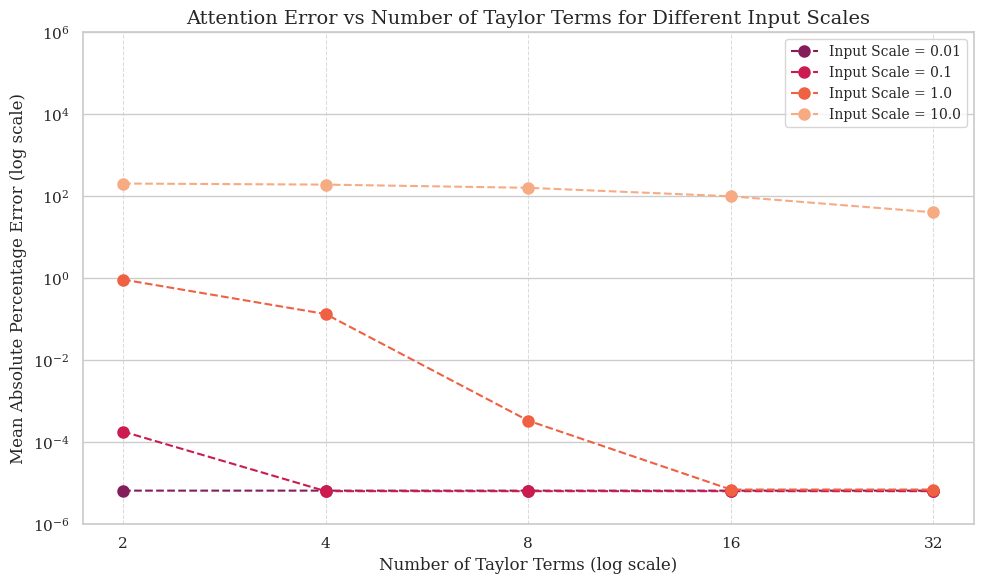

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a DataFrame
data = pd.read_csv('results/error_results.csv')
# Set the style of the seaborn plot
sns.set(style="whitegrid", font="serif")
# plt.rcParams.update({'font.family': 'serif', })
palette = sns.color_palette("ch:start=.2,rot=-.3")
palette = sns.color_palette("rocket", n_colors=data["MagnitudeScale"].nunique()+1)[1:]



# Create the figure and axis
plt.figure(figsize=(10, 6))

# Define custom x-axis ticks
x_ticks = [2, 4, 8, 16, 32]

# Plot lines and error bars for each Magnitude Scale
for i, scale in enumerate(data["MagnitudeScale"].unique()):
    subset = data[data["MagnitudeScale"] == scale]
    color = palette[i]
    # Plot the line with markers
    plt.plot(
        subset["K"], 
        subset["MeanMAPE"], 
        label=f"Input Scale = {scale}", 
        marker='o', 
        linestyle='--', 
        linewidth=1.5, 
        markersize=8, 
        color=color
    )
    # Add error bars with greyed color
    # plt.errorbar(
    #     subset["K"], 
    #     subset["MeanMAPE"], 
    #     yerr=subset["StdDevMAPE"], 
    #     fmt='o', 
    #     capsize=5, 
    #     color=[x * 0.5 for x in color], 
    #     label="_nolegend_"
    # )

# Set x-axis to log scale and define ticks
plt.xscale("log")
plt.xticks(x_ticks, labels=x_ticks)
plt.gca().set_xticks(x_ticks, minor=True)  # Ensure gridlines match

# Add vertical gridlines at tick locations
plt.grid(which="both", axis="x", linestyle="--", linewidth=0.75, alpha=0.7)

# Set plot labels, title, and scaling
plt.xlabel("Number of Taylor Terms (log scale)", fontsize=12, fontfamily='serif')
plt.ylabel("Mean Absolute Percentage Error (log scale)", fontsize=12, fontfamily='serif')
plt.yscale("log")
plt.title("Attention Error vs Number of Taylor Terms for Different Input Scales", fontsize=14, fontfamily='serif')

plt.ylim(1e-6, 1e6)

# Customize the legend
plt.legend(fontsize=10, title_fontsize=12)

# Adjust layout
plt.tight_layout()